# Diferencialinės lygtys P3

Turinys:

* Koši uždavinio sprendimas skaitmeniškai (ir grafiškai)
* Palyginimas su tiksliu sprendiniu
* Koši uždavinio sprendimas su Scipy

Programavimui mums aktualūs skyriai iš "Numerical Python" knygos (VMA aplinkoje) yra 1-5 ir 9.

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Koši uždavinio sprendimas skaitmeniškai (ir grafiškai)

Nagrinėsime tą pačią diferencialinę lygtį $\ y'=F(x,y)\ $ kaip ir praeitą kartą, su $\ F(x,y)=y-x^2$.

In [5]:
# def F(x,y):
#     return y - x**2
def F(x,y):
    # return 1 / (x + 2*y)
    # return (2*x*y - y**2) / (x**2)
    return (x + 2*y) / x

Nagrinėsime sprendinius intervale $\ x\in [-3,3], $ sprendinius grafiškai stebėsime lange $\ y\in [-2,4]$.

In [6]:
xa, xb = -3, 3
ya, yb = -2, 4

Sprendinio grafiką braižysime kartu su krypčių lauku, kurį braižome panašiai kaip praeitą kartą.

Apibrėžiame koordinatinius masyvus $X,Y$, ir išplėčiame juos į dvimates gardeles (krypčių laukui).

In [7]:
X = np.linspace(xa,xb,20)
Y = np.linspace(ya,yb,20)

In [8]:
X2, Y2 = np.meshgrid(X,Y)

Krypčių lauko vektoriai yra $(1,y')$, arba normalizavus į vienetinį ilgį, 
$\displaystyle\left(\frac1{\sqrt{(y')^2+1}},\frac{y'}{\sqrt{(y')^2+1}}\right)$.

FY yra išvestinių masyvas; GX ir GY yra normalizuotų vektorių koordinačių masyvai.

In [9]:
FY = F(X2,Y2)

In [10]:
GX = 1/np.sqrt(FY**2+1)

In [11]:
GY = FY*GX

Braižome krypčių lauką kaip praeitą kartą.

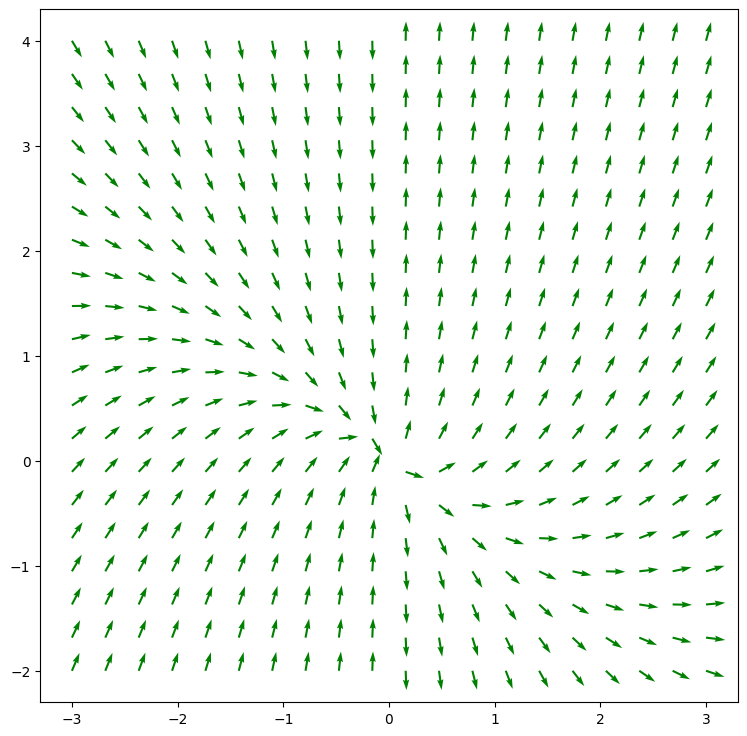

In [12]:
plt.figure(figsize=(9,9))
plt.quiver(X2,Y2,GX,GY,color="green")
plt.show()

**Čia pradedame skaičiuoti skaitmeninį sprendinį diferencialinei lygčiai** $\ y'=F(x,y)$.

Pasirenkame daugiau koordinatinių taškų nei braižant vektorių lauką (glodesniam grafikui).

$h\ $ bus diferencialinės lygties integravimo žingsnis.

In [13]:
N = 50
h = (xb-xa)/N

Tarkime, duota pradinė sąlyga yra $\ y(0)=\frac12$.

In [14]:
x0 = 2
y0 = 1

Pradinį tašką $x_0$ atitiks šis indeksas koordinatiniame masyve $[x_0,x_1,\ldots,x_N]$.

In [15]:
N0 = round(N*(x0-xa)/(xb-xa))
N0

42

Sudarome koordinatinį masyvą, ir nutaikome, kad indeksu $N_0$ turėtume pradinį tašką $x_0$.

In [16]:
x = np.linspace(xa,xb,N+1)
x = x + (x0-x[N0])

Apibrėžiame sprendinio reikšmių masyvą, ir įstatome pradinę reikšmę.

In [17]:
y = np.zeros(N+1)
y[N0] = y0

Paskaičiuojame sprendinio reikšmes pagal Oilerio tiesioginį metodą, abiejomis kryptimis.

In [18]:
for k in range(N0,N):
    y[k+1] = y[k]+h*F(x[k],y[k])

In [19]:
for k in range(N0,0,-1):
    y[k-1] = y[k]-h*F(x[k],y[k])

Braižome sprendinio grafiką kartu su krypčių lauku.

Kol kas nekreipiame dėmesio į sprendinio apibrėžimo sritį, tik aprėžiame vertikalų langą paveiksliukui.

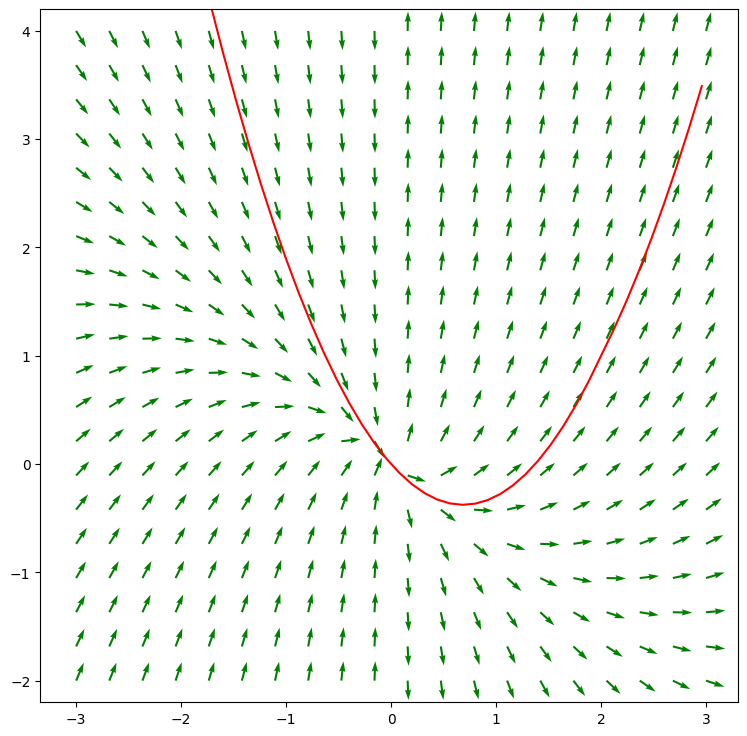

In [20]:
plt.figure(figsize=(9,9))
plt.quiver(X2,Y2,GX,GY,color="green")
plt.plot(x,y,color="red")
plt.ylim([ya-0.2, yb+0.2])
plt.show()

# Palyginimas su tiksliu sprendiniu

Tikslų Koši uždavinio sprendinį skaičiuosime su Sympy.

Kadangi "x" naudojame (ilgesniam) koordinatiniam masyvui, 
naudosime "z" nepriklausomajam kintamajam nurodyti, bet jį vis tiek vaizduosime kaip "x". 
Toks triukas dažniausiai yra nepatartinas, bet šiuo atveju atrodo patogiai.

In [21]:
z, C = sp.symbols("x C")

Kol kas nenaudojame automatinių Sympy galimybių diferencialinių lygčių sprendimui.
Bet galime patikrinti šį bendrąjį sprendinį.

In [22]:
YC = C*sp.exp(z)+z**2+2*z+2
YC

C*exp(x) + x**2 + 2*x + 2

Palyginame, kad šio sprendinio išvestinė atitinka diferencialinę lygtį $\ y'=F(x,y)$.

In [23]:
sp.diff(YC,z)

C*exp(x) + 2*x + 2

In [24]:
F(z,YC)

(2*C*exp(x) + 2*x**2 + 5*x + 4)/x

Arba galime tikrinti su logine operacija (vietoj vizualaus palyginimo).

In [25]:
sp.diff(YC,z) == F(z,YC)

False

Atskiram sprendiniui (tenkinančiam pradinę sąlygą $y(0)=\frac12$) randame laisvąją konstantą.

In [26]:
CL = sp.Eq( F(z,YC).subs(z,0), y0 )
CL

Eq(zoo*(2*C + 4), 1)

In [27]:
sp.solve(CL,C)

[]

Apibrėžiame atskirąjį sprendinį.

In [28]:
YA = YC.subs(C,-1.5)
YA

x**2 + 2*x - 1.5*exp(x) + 2

Reikėtų paversti šią simbolinę sprendinio išraišką tikslaus sprendinio reikšmių masyvu.

Tam verčiame YA į Python'o funkciją YT, kurią naudojame tikslaus sprendinio reikšmių masyvui yt apibrėžti.

In [29]:
YT = sp.lambdify(z, YA, "numpy")
YT

<function _lambdifygenerated(x)>

In [30]:
yt = YT(x)

Ką tik naudojome "x", o ne "z"!

Galime ir palyginti paskaičiuotą aproksimuojantį sprendinį "y" su tiksliu sprendiniu "yt".

In [31]:
y - yt

array([ 5.61483319e+00,  5.39705372e+00,  5.17461935e+00,  4.94767877e+00,
        4.71639966e+00,  4.48097106e+00,  4.24160612e+00,  3.99854516e+00,
        3.75205915e+00,  3.50245359e+00,  3.25007295e+00,  2.99530560e+00,
        2.73858946e+00,  2.48041823e+00,  2.22134861e+00,  1.96200824e+00,
        1.70310480e+00,  1.44543618e+00,  1.18990203e+00,  9.37516662e-01,
        6.89423742e-01,  4.46912737e-01,  2.11437516e-01, -1.53626857e-02,
       -2.31639636e-01, -4.35309458e-01, -6.24022590e-01, -7.95129905e-01,
       -9.45644524e-01, -1.07219875e+00, -1.17099550e+00, -1.23775361e+00,
       -1.26764605e+00, -1.25523037e+00, -1.19437022e+00, -1.07814689e+00,
       -8.98759561e-01, -6.47412816e-01, -3.14189867e-01,  1.12090439e-01,
        6.44034815e-01,  1.29585729e+00,  2.08358415e+00,  3.00230623e+00,
        4.09277429e+00,  5.37795925e+00,  6.88376078e+00,  8.63938064e+00,
        1.06777437e+01,  1.30359728e+01,  1.57559237e+01])

Geriau palyginti grafiškai. Aproksimacijos klaida (vertikalus skirtumas) tampa žymus didesniems $x>0$.

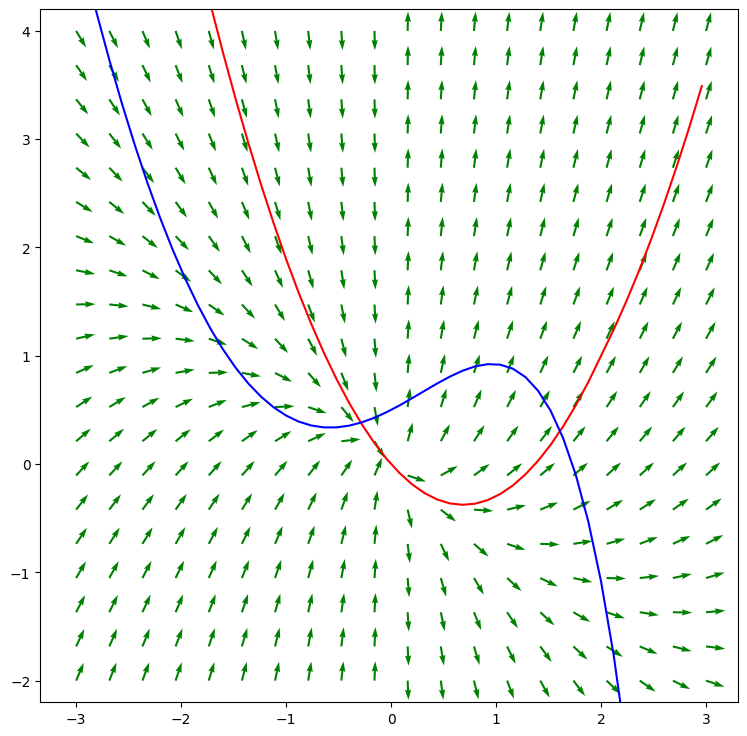

In [32]:
plt.figure(figsize=(9,9))
plt.quiver(X2,Y2,GX,GY,color="green")
plt.plot(x,y,color="red")
plt.plot(x,yt,color="blue")
plt.ylim([ya-0.2, yb+0.2])
plt.show()

Aproksimacijos paklaidos grafikas

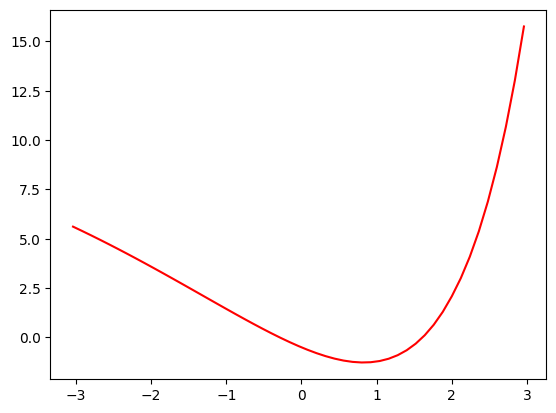

In [33]:
plt.figure()
plt.plot(x,y-yt,color="red")
plt.show()

# Koši uždavinio sprendimas su Scipy

Vietoj to, kad gerinti skaitinio integravimo metodą (ar smulkinti intervalą [xa,xb]), 
galime naudotis paruoštu paketu Scipy (Scientific Python).

In [34]:
import scipy.integrate as sc

ModuleNotFoundError: No module named 'scipy'

Darbui su Scipy, turime apibrėžti $F(x,y)$ diferencialinėje lygtyje $y'=F(x,y)$ su atbuline argumentų tvarka.

In [ ]:
def FF(y,x):
    return F(x,y)

Su paruoštu koordinačių masyvu "x", sprendžiame Koši uždavinį į teigiamą pusę:

In [ ]:
yp = sc.odeint(FF, y0, x[N0:])

ir į neigiamą pusę:

In [ ]:
yn = sc.odeint(FF, y0, x[N0::-1])

Sprendinio reikšmių masyvai yra (dvimačiai) stulpeliniai vektoriai. Vaizdavimui tai tiks.

In [ ]:
yp

array([[  0.5       ],
       [  0.56315474],
       [  0.63072628],
       [  0.69960589],
       [  0.7662884 ],
       [  0.8268218 ],
       [  0.87675016],
       [  0.91104951],
       [  0.92405526],
       [  0.90938064],
       [  0.85982457],
       [  0.76726788],
       [  0.6225562 ],
       [  0.41536806],
       [  0.13406596],
       [ -0.23447129],
       [ -0.70503781],
       [ -1.29431392],
       [ -2.02110663],
       [ -2.90662078],
       [ -3.97476478],
       [ -5.25249523],
       [ -6.77020567],
       [ -8.56216471],
       [-10.6670101 ],
       [-13.12830576]])

Galime vaizduoti ir grafiškai

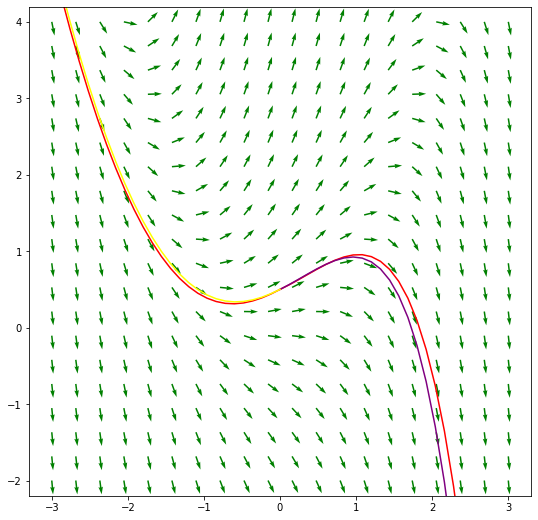

In [ ]:
plt.figure(figsize=(9,9))
plt.quiver(X2,Y2,GX,GY,color="green")
plt.plot(x,y,color="red")
plt.plot(x[N0:],yp,color="purple")
plt.plot(x[N0::-1],yn,color="yellow")
plt.ylim([ya-0.2, yb+0.2])
plt.show()

Patogiau yra apjungti dalinius grafikus "yp" ir "yn" į visą sprendinio reikšmių masyvą "yy". 
Tam turime kreipti dėmesį:

* Stulpeliniai masyvai "yp" ir "yn" turi būti paversti vienamačiais masyvais (galutiniam apjungimui);
* Masyvas "yn" turėtų būti apgręžtas atbuline tvarka;
* Reikėtų išvengti pradinės sąlygos reikšmės "y0" dubliavimo.

In [ ]:
yn.flatten()

array([0.5       , 0.44401933, 0.39765821, 0.36308549, 0.34222489,
       0.33678252, 0.34827158, 0.3780342 , 0.42726065, 0.4970067 ,
       0.58820867, 0.70169704, 0.83820835, 0.99839589, 1.18283904,
       1.39205167, 1.62648957, 1.88655694, 2.17261233, 2.4849737 ,
       2.82392309, 3.18971061, 3.58255811, 4.00266237, 4.45019787,
       4.9253194 ])

In [ ]:
yn.flatten()[:0:-1]

array([4.9253194 , 4.45019787, 4.00266237, 3.58255811, 3.18971061,
       2.82392309, 2.4849737 , 2.17261233, 1.88655694, 1.62648957,
       1.39205167, 1.18283904, 0.99839589, 0.83820835, 0.70169704,
       0.58820867, 0.4970067 , 0.42726065, 0.3780342 , 0.34827158,
       0.33678252, 0.34222489, 0.36308549, 0.39765821, 0.44401933])

Atkreipkite dėmesį, kad np.concatenate() argumentas čia yra formaliai vienas: 
papildomai apskliausta dviejų Numpy masyvų eilutė (string).

In [ ]:
yy = np.concatenate( ( yn.flatten()[:0:-1], yp.flatten() ) )
yy

array([  4.9253194 ,   4.45019787,   4.00266237,   3.58255811,
         3.18971061,   2.82392309,   2.4849737 ,   2.17261233,
         1.88655694,   1.62648957,   1.39205167,   1.18283904,
         0.99839589,   0.83820835,   0.70169704,   0.58820867,
         0.4970067 ,   0.42726065,   0.3780342 ,   0.34827158,
         0.33678252,   0.34222489,   0.36308549,   0.39765821,
         0.44401933,   0.5       ,   0.56315474,   0.63072628,
         0.69960589,   0.7662884 ,   0.8268218 ,   0.87675016,
         0.91104951,   0.92405526,   0.90938064,   0.85982457,
         0.76726788,   0.6225562 ,   0.41536806,   0.13406596,
        -0.23447129,  -0.70503781,  -1.29431392,  -2.02110663,
        -2.90662078,  -3.97476478,  -5.25249523,  -6.77020567,
        -8.56216471, -10.6670101 , -13.12830576])

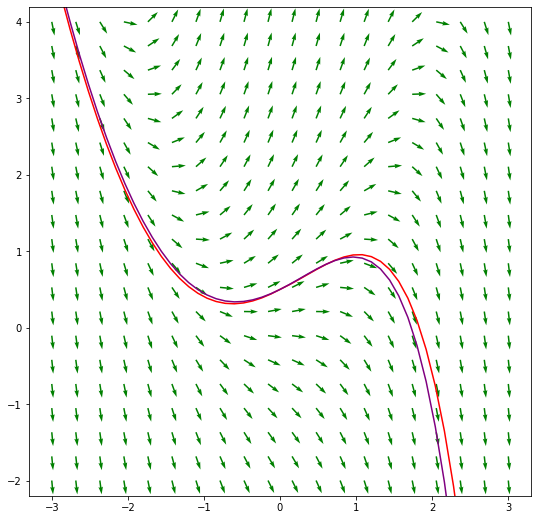

In [ ]:
plt.figure(figsize=(9,9))
plt.quiver(X2,Y2,GX,GY,color="green")
plt.plot(x,y,color="red")
plt.plot(x,yy,color="purple")
plt.ylim([ya-0.2, yb+0.2])
plt.show()

Dar galėtumėne pridėti tikslaus sprendinio "yt" grafiką, 
bet Scipy sprendinys "yy" yra tikslus 7-ių ženklų po kablelio tisklumu, tad "yy" ir "yt" sprendiniai persidengtų.

In [ ]:
yy-yt

array([ 2.28537722e-09,  1.12987539e-08,  2.43182345e-08,  1.82440827e-08,
        1.61094005e-08,  1.58407270e-08,  1.44518495e-08,  1.29570106e-08,
        1.12269489e-08,  9.33328193e-09,  6.71251610e-09,  1.32725297e-09,
       -5.67291214e-09, -7.56480101e-09, -8.87840623e-09, -1.09788727e-08,
       -1.21223328e-08, -1.84139234e-08, -1.48434720e-08, -4.03685683e-08,
       -2.45144863e-08, -2.22586258e-08, -1.80925656e-08,  3.93588701e-09,
       -1.53217724e-08,  0.00000000e+00,  1.35681464e-08,  7.09177272e-10,
        1.08899865e-08,  7.96047417e-09, -4.15670964e-09, -2.72298309e-08,
       -2.15202670e-08, -2.67557532e-08, -3.30559683e-08, -4.19807439e-08,
       -5.12907681e-08, -7.27502671e-08, -7.58158922e-08, -8.01001654e-08,
       -9.32745767e-08, -1.08006758e-07, -1.25617934e-07, -1.45832082e-07,
       -1.69278176e-07, -2.10029178e-07, -2.33470934e-07, -2.57354113e-07,
       -2.87557750e-07, -3.26270653e-07, -3.71239404e-07])

Didesniems $x>0$ paklaida pamažu didėja ir Scipy sprendiniui.

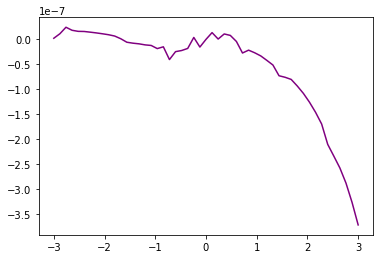

In [ ]:
plt.figure()
plt.plot(x,yy-yt,color="purple")
plt.show()

Dviejų paklaidų grafiko nėra reikalo ir lyginti.

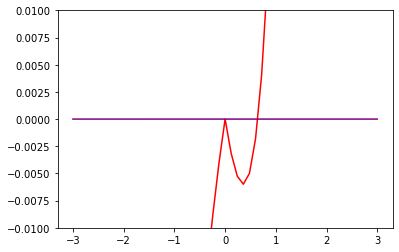

In [ ]:
plt.figure()
plt.plot(x,y-yt,color="red")
plt.plot(x,yy-yt,color="purple")
plt.ylim([-0.01,0.01])
plt.show()

# Steps
- Define the Function
- Define a,b for x,y, - the boundaries of the calculation
- Define sample size $N$
- Calculate $h$ (the $\Delta$)
- Prepare linearspace arrays
- Meshgrid them together
- Normalize vectors
- Plot
- Calculate index of first y according to Koshi initial condition
- Use oiler's method to the right, then to the left
- Plot

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
def F(x,y):
    # return 1 / (x + 2*y)
    # return (2*x*y - y**2) / (x**2)
    return (x + 2*y) / x

In [35]:
ax, bx = -3, 3
ay, by = -2, 4

In [36]:
N=20

In [37]:
h = (bx-ax)/N

In [59]:
X = np.linspace(ax,bx,22)
Y = np.linspace(ay,by,22)

In [60]:
X2,Y2 = np.meshgrid(X,Y)

In [61]:
FX = F(X2,Y2)

In [62]:
GX = 1/np.sqrt(FX**2+1)
GY = FX*GX

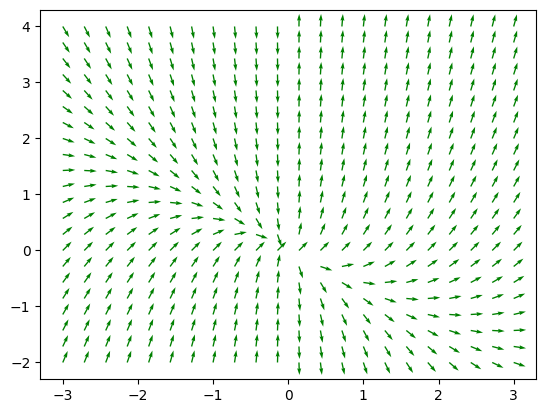

In [63]:
plt.figure()
plt.quiver(X2,Y2,GX,GY,color="green")

In [64]:
# y(1) = -1
x0 = np.array([1, 2, 4])
y0 = np.array([-1, 0, -1])
STEPS=100
# N = round(N*(x0-ax)/(bx-ax))
N0 = [round(STEPS*(_x0-ax)/(bx-ax)) for _x0 in x0]
N0

[67, 83, 117]

In [66]:
X = []
for i, k in enumerate(x0):
    x = np.linspace(ax,bx,N+1)
    x = x + k - x[N0[i]]
    X.append(x)
X

IndexError: index 67 is out of bounds for axis 0 with size 21

In [ ]:
Y = np.zeros((len(x0), STEPS))
# y[N0] = y0
for i, v in enumerate(N0):
    Y[i][v] = y0[i]
Y

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [ ]:
for i, y in enumerate(Y):
    for j in range(N0[i],N):
        y[j+1] = y[j] + h*F(X[i][j],y[j])

In [ ]:
for i, y in enumerate(Y):
    for j in range(N0[i],0, -1):
        y[j+1] = y[j] - h*F(X[i][j],y[j])

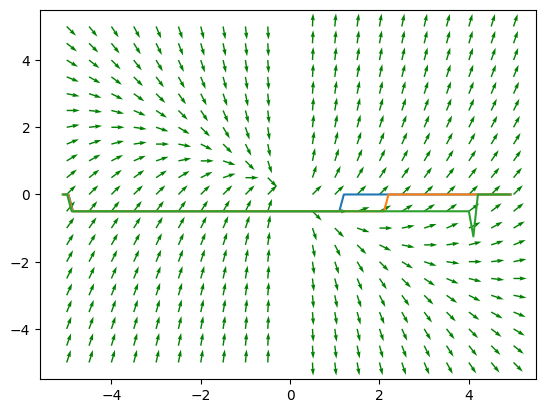

In [ ]:
plt.figure()
plt.quiver(X2,Y2,GX,GY,color="green")
for i, y in enumerate(Y):
    plt.plot(X[i],y)
plt.show()